In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("orvile/brain-cancer-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-cancer-mri-dataset


In [ ]:
data_path = r"/kaggle/input/brain-cancer-mri-dataset/Brain_Cancer raw MRI data/Brain_Cancer"
# Folder names exactly as in the dataset
categories = ["brain_glioma", "brain_menin", "brain_tumor"]

In [ ]:
data = []
labels = []

for label_index, category in enumerate(categories):
    folder_path = os.path.join(data_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # resize for faster training
            data.append(img)
            labels.append(label_index)


In [ ]:
X = np.array(data, dtype='float32') / 255.0  # normalize pixels to [0, 1]
y = np.array(labels)


In [ ]:
y_cat = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y
)

In [39]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))




In [40]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)


Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.5652 - loss: 0.8835 - val_accuracy: 0.6553 - val_loss: 0.7686
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7290 - loss: 0.6625 - val_accuracy: 0.7884 - val_loss: 0.5143
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 1000ms/step - accuracy: 0.7699 - loss: 0.5480 - val_accuracy: 0.8122 - val_loss: 0.4700
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 1000ms/step - accuracy: 0.8221 - loss: 0.4493 - val_accuracy: 0.8091 - val_loss: 0.4742
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 996ms/step - accuracy: 0.8417 - loss: 0.4036 - val_accuracy: 0.8359 - val_loss: 0.4182
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8670 - loss: 0.3428 - val_accuracy: 0.8359 - val_loss: 0.3942
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 138s 975ms/step - accuracy: 0.8940 - loss: 0.2803 - val_accuracy: 0.8535 - val_loss: 0.4005
Epoch 8/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9027 - loss: 0.2

In [42]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 267ms/step - accuracy: 0.8695 - loss: 0.4661
Test Accuracy: 87.05%


In [43]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=categories))


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step
              precision    recall  f1-score   support

brain_glioma       0.94      0.84      0.89       401
 brain_menin       0.78      0.91      0.84       401
 brain_tumor       0.91      0.87      0.89       410

    accuracy                           0.87      1212
   macro avg       0.88      0.87      0.87      1212
weighted avg       0.88      0.87      0.87      1212



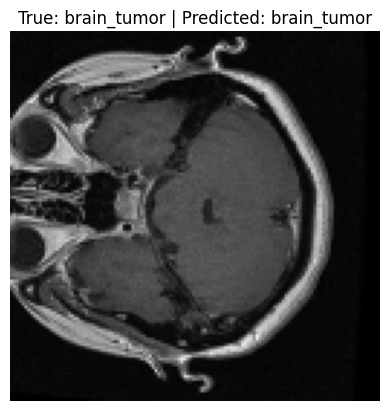

In [44]:
idx = 7
plt.imshow(X_test[idx])
plt.title(f"True: {categories[y_true_labels[idx]]} | Predicted: {categories[y_pred_labels[idx]]}")
plt.axis('off')
plt.show()


In [45]:
model.save('model.keras')